### MACHINE LEARNING PROJECT 1

#### TOPIC: FATAL ACCIDENTS PREDICTION IN UK
#### DATA: OPEN SOURSE DATA FROM UK DEPARTMENT OF TRANSPORT
##### BY BRIAN

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats

In [2]:
# Features pre-processing and principal component analysis (pca) 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Train-test split
from sklearn.model_selection import train_test_split

# Classifiers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

# Classifiers ensembling
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from mlxtend.classifier import StackingClassifier

# Classifiers evaluation metrics
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

# Random resampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Tuning hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# Other
from time import time
from scipy.stats import ttest_ind

# Ploting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from IPython.display import display
pd.options.display.float_format = '{:.3f}'.format

# Suppressing annoying harmless error
import warnings
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# define new print function which contains color option
import sys

python_print = print

def print(*objects, sep=' ', end='\n', file=sys.stdout, color=(), fit_len=-1):
    line = "".join(map(str, objects))
    fit_len = max(fit_len - len(line), 0)
    for c in color:
        if len(objects) > 1:
            objects = (f"\033[{c}m{objects[0]}",) + objects[1:-1] + (
                f"{objects[-1]}{' ' * fit_len}\033[0m",)
        elif len(objects) == 1:
            objects = (f"\033[{c}m{objects[0]}{' ' * fit_len}\033[0m",)
    python_print(*objects, sep=sep, end=end, file=file)

## Step 1: Data preprocessing

In [4]:
# download dataset
!wget https://raw.githubusercontent.com/skyu0221/online-dropbox/master/ml/capstone1/project1/UK_RoadSafety_Accidents.csv

# load data
df = pd.read_csv("UK_RoadSafety_Accidents.csv") # df=dataframe

--2020-07-30 20:46:39--  https://raw.githubusercontent.com/skyu0221/online-dropbox/master/ml/capstone1/project1/UK_RoadSafety_Accidents.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18721065 (18M) [text/plain]
Saving to: ‘UK_RoadSafety_Accidents.csv’

UK_RoadSafety_Accid 100%[===================>]  17.85M  80.0MB/s    in 0.2s    

2020-07-30 20:46:40 (80.0 MB/s) - ‘UK_RoadSafety_Accidents.csv’ saved [18721065/18721065]



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               136621 non-null  object 
 1   Location_Easting_OSGR                        136614 non-null  float64
 2   Location_Northing_OSGR                       136614 non-null  float64
 3   Longitude                                    136614 non-null  float64
 4   Latitude                                     136614 non-null  float64
 5   Police_Force                                 136621 non-null  int64  
 6   Accident_Severity                            136621 non-null  int64  
 7   Number_of_Vehicles                           136621 non-null  int64  
 8   Number_of_Casualties                         136621 non-null  int64  
 9   Date                                         136621 non-nul

## Step 2: Data Cleaning


In [6]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.000,188730.000,-0.279,51.585,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.000,0,-1,-1,0,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.000,174560.000,0.185,51.450,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.000,9,4,6,0,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.000,183850.000,-0.474,51.544,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.000,1,4,3,4020,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.000,168930.000,-0.164,51.405,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.000,3,2,3,217,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.000,177230.000,-0.407,51.483,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.000,0,-1,-1,0,0,0,1,1,1,0,0,1,1,E01002583


In [7]:
df.shape

(136621, 32)

In [8]:
print(df.isnull().sum())

Accident_Index                                    0
Location_Easting_OSGR                             7
Location_Northing_OSGR                            7
Longitude                                         7
Latitude                                          7
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              2
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                      37
Junction_Detail                                   0
Junction_Con

In [9]:
# LSOA_of_Accident_Location stands for "Lower Super Ouput Area of 
# Accident_Location (England & Wales only)", therefore it's not very useful
df = df.drop(['LSOA_of_Accident_Location'], axis=1)
df = df.dropna(axis=0, how='any') ## side note: axis=0 means x-axis, axis=1 means y-axis.

In [10]:
# re-run previous fn
print(df.isnull().sum()) # isnull fn: true=1, false=0

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [11]:
df.shape[0] # number of lines remaining

136575

In [12]:
df.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,2016010000005,519310.000,188730.000,-0.279,51.585,1,3,2,1,01/11/2016,3,02:30,28,E09000005,3,4006,6,30.000,0,-1,-1,0,0,0,5,1,1,0,0,1,1
1,2016010000006,551920.000,174560.000,0.185,51.450,1,3,1,1,01/11/2016,3,00:37,18,E09000004,3,207,6,30.000,9,4,6,0,0,0,4,1,1,0,0,1,1
2,2016010000008,505930.000,183850.000,-0.474,51.544,1,3,1,1,01/11/2016,3,01:25,26,E09000017,3,4020,1,30.000,1,4,3,4020,0,0,4,1,1,0,0,1,1
3,2016010000016,527770.000,168930.000,-0.164,51.405,1,3,1,1,01/11/2016,3,09:15,22,E09000024,3,217,6,30.000,3,2,3,217,0,0,1,1,1,0,0,1,1
4,2016010000018,510740.000,177230.000,-0.407,51.483,1,3,2,1,01/11/2016,3,07:53,25,E09000018,3,312,3,40.000,0,-1,-1,0,0,0,1,1,1,0,0,1,1


## Step 3: Data Analysis

### Step 3-0: Aggregation (re-define)
Original accident severty contains 3 levels: Fatal (1)/ Serious (2)/ Slight (3);\
New accident severty contains 2 levels: Fatal OR Serious (1)/ Slight (0).

In [13]:
# re-define the index of levels to 0 and 1
df['Serious_Accident'] = 1
df['Serious_Accident'][df['Accident_Severity'] == 3] = 0
print('Count of outcome variable: \n', df['Serious_Accident'].value_counts())

Count of outcome variable: 
 0    113160
1     23415
Name: Serious_Accident, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


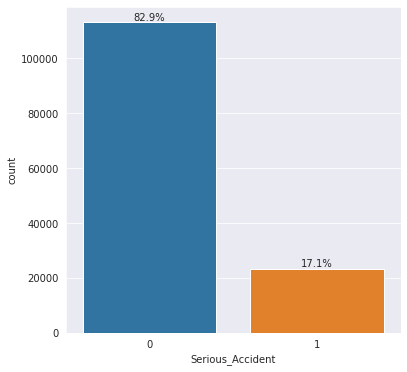

In [14]:
# Count plot 
plt.figure(figsize=(6,6))
ax = sns.countplot(x=df.Serious_Accident)

# get the percentage above each histogram
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100. * y / df['Serious_Accident'].value_counts().sum()), (x.mean(), y),
                ha='center', va='bottom') # set the alignment of the text
plt.show()

### Step 3-1: Observing Numerical Variables

**Latitude & Longitude**

In [15]:
# rename samples for convenience
slight = df[df['Serious_Accident'] == 0]
serious = df[df['Serious_Accident'] == 1] # slight and serious are dataframes

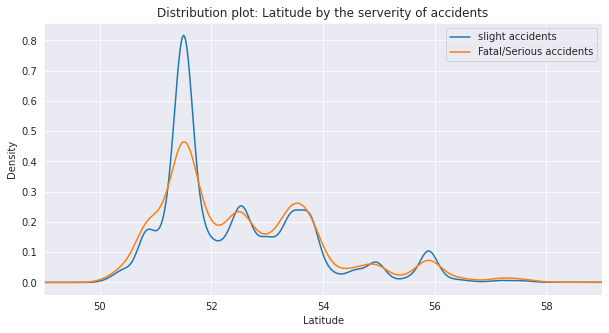

In [16]:
plt.figure(figsize=(10,5))
# Latitude
slight.Latitude.plot.density(label="slight accidents")
serious.Latitude.plot.density(label="Fatal/Serious accidents")
plt.legend()
plt.title('Distribution plot: Latitude by the serverity of accidents')
plt.xlim((49, 59))
plt.xlabel("Latitude")
plt.show()

We can observe from the plot that the peaks of slight and serious accidents are at the same latitude, meaning the accidents happens more frequently at some specific latitude. Therefore, **latitude** is a useful feature and it is related to the severity of accidents.

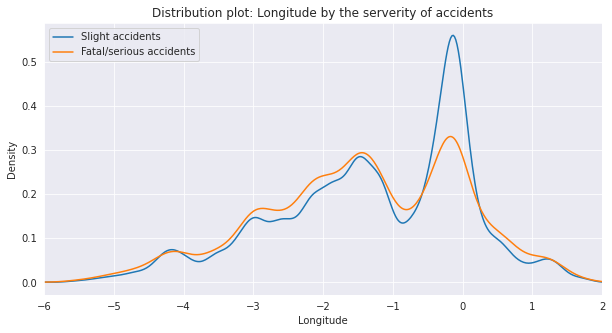

In [17]:
plt.figure(figsize=(10,5))

# Longitude
slight.Longitude.plot.density(label="Slight accidents")
serious.Longitude.plot.density(label="Fatal/serious accidents")
plt.legend()
plt.title('Distribution plot: Longitude by the serverity of accidents')
plt.xlim((-6, 2))
plt.xlabel("Longitude")
plt.show()

Similarly, we observe from the plot that the peaks of slight and serious accidents are at the same longitude around 0, meaning the accidents happens more frequently around 0. Therefore, **longitude** is a useful feature and it is related to the severity of accidents.

**Number of Vehicles Involved**

In [18]:
# Count and descriptive statistics
print("Statistics about number of vehicles involved in each accident", color=[1])
print(df['Number_of_Vehicles'].describe()) 
print()
print("Number of accidents for different number of vehicles", color=[1])
count = df.groupby('Number_of_Vehicles')['Accident_Index'].count().to_frame()
count["Percentage"] = count / len(df) * 100
print(count)

Statistics about number of vehicles involved in each accident
count   136575.000
mean         1.848
std          0.710
min          1.000
25%          1.000
50%          2.000
75%          2.000
max         16.000
Name: Number_of_Vehicles, dtype: float64

Number of accidents for different number of vehicles
                    Accident_Index  Percentage
Number_of_Vehicles                            
1                            39521      28.937
2                            82841      60.656
3                            10959       8.024
4                             2446       1.791
5                              517       0.379
6                              169       0.124
7                               72       0.053
8                               26       0.019
9                               11       0.008
10                               6       0.004
11                               4       0.003
12                               1       0.001
13                               

In [19]:
# To avoid the rare cases and simplify the task, ignore accidents with more than 4 cars.
df = df.drop(df[df.Number_of_Vehicles > 4].index)

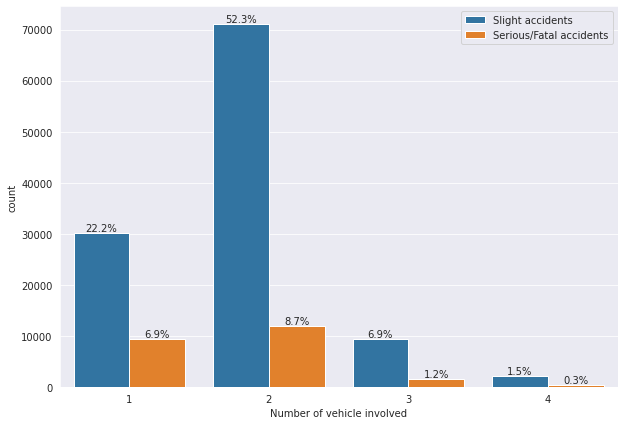

In [20]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x=df.Number_of_Vehicles, hue=df.Serious_Accident)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100. * y / df['Serious_Accident'].value_counts()
    .sum()), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
plt.xlabel("Number of vehicle involved")
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

Notice serious and non-serious accidents have peaks when 2 vehicles are involved. Thus **Number of vehicle involved** is related to the severity of accident in a way.  

**Number of Casualities** (number of injuries)

In [21]:
# Count and descriptive statistics
print("Statistics about number of casualties involved in each accident",
      color=[1])
print(df['Number_of_Casualties'].describe())
print()
print("Number of accidents for different number of casualties", color=[1])
count = df.groupby('Number_of_Casualties')['Accident_Index'].count().to_frame()
count["Percentage"] = count / len(df) * 100
print(count)

Statistics about number of casualties involved in each accident
count   135767.000
mean         1.321
std          0.774
min          1.000
25%          1.000
50%          1.000
75%          1.000
max         58.000
Name: Number_of_Casualties, dtype: float64

Number of accidents for different number of casualties
                      Accident_Index  Percentage
Number_of_Casualties                            
1                             106431      78.392
2                              20365      15.000
3                               5834       4.297
4                               2003       1.475
5                                725       0.534
6                                242       0.178
7                                 72       0.053
8                                 36       0.027
9                                 17       0.013
10                                15       0.011
11                                 4       0.003
12                                 6       0.004

In [22]:
# To avoid the rare cases and simplify the task,
# ignore accidents with more than 4 cars.
df = df.drop(df[df.Number_of_Casualties > 4].index)

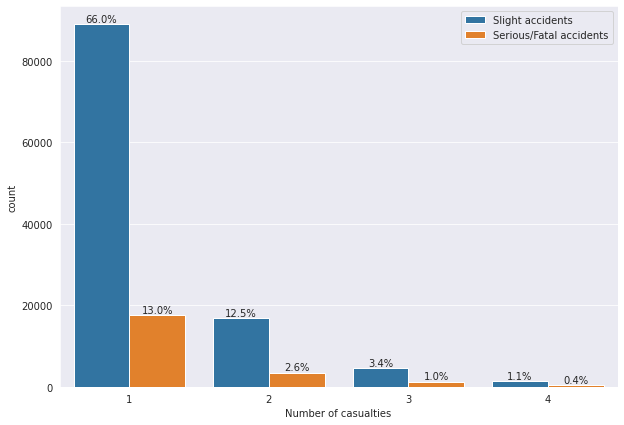

In [23]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x=df.Number_of_Casualties, hue=df.Serious_Accident)
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100. * y / df['Serious_Accident'].value_counts().sum()), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
plt.xlabel("Number of casualties")
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

Commonly, slight accident happens when there is only one person involves in the accident. We would consider **Number of Casualties** as a useful feature.

### Step 3-2: Observing Categorical Variables


Use chi-squared test of independence. The null hypothesis is: two columns are independent. 

In [24]:
def chi_sq_test(col1, col2):
    count_table = pd.crosstab(df[col1], df[col2])
    print(count_table)
    print(stats.chisquare(count_table, axis=None))

* **Day of Week**

In [25]:
# define day of week index (encoding)
mapper = {1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday",
          6:"Friday", 7:"Saturday"}
df["Day_of_Week"] = [mapper[i] for i in df["Day_of_Week"]] # change num to letters

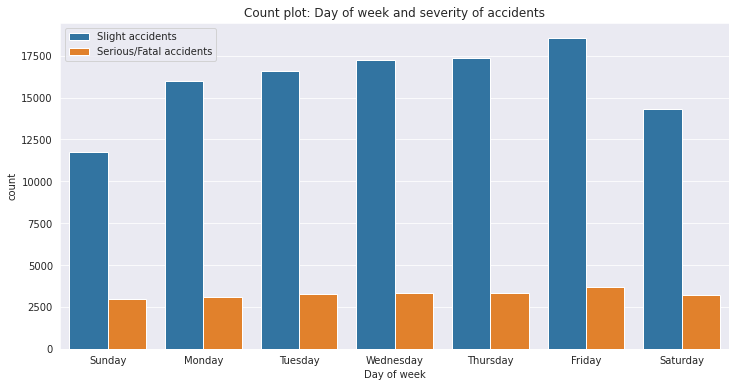

Chi-squared test of independence between days of week and severity of accidents

Day_of_Week       Friday  Monday  Saturday  ...  Thursday  Tuesday  Wednesday
Serious_Accident                            ...                              
0                  18544   15958     14295  ...     17356    16603      17266
1                   3700    3077      3199  ...      3312     3254       3336

[2 rows x 7 columns]
Power_divergenceResult(statistic=62008.82242095178, pvalue=0.0)


In [26]:
plt.figure(figsize=(12,6))
# Count plot  
sns.countplot(x=df['Day_of_Week'], hue="Serious_Accident", data=df, order=[mapper[i] for i in mapper])
plt.xlabel('Day of week')
plt.title('Count plot: Day of week and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
# p-value less than 0.05, reject null
print('Chi-squared test of independence between days of week and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','Day_of_Week')

Based on the hist plot, we would see variable **Day of Week** does not significantly affect the chance of happening of fatal/serious accidents. However, we do notice that the slight accidents are more likely to happen on weekdays, especially on Friday, and less likely to happen on weekends. The p-value after computing the chi-sq test is less than 0.05, thus the null hypothesis is rejected, meaning **Day of Week** and **Severity of Accidents** are correlated. 


* **Month of Year**

In [27]:
# Split date into month
df['month'] = pd.DatetimeIndex(df['Date']).month

# Month of year
mapper = {1: "JAN", 2: "FEB", 3: "MAR", 4: "APR", 5: "MAY", 6: "JUN",
          7: "JUL", 8: "AUG", 9: "SEP", 10: "OCT", 11: "NOV", 12: "DEC"}
df['month'] = [mapper[i] for i in df['month']]

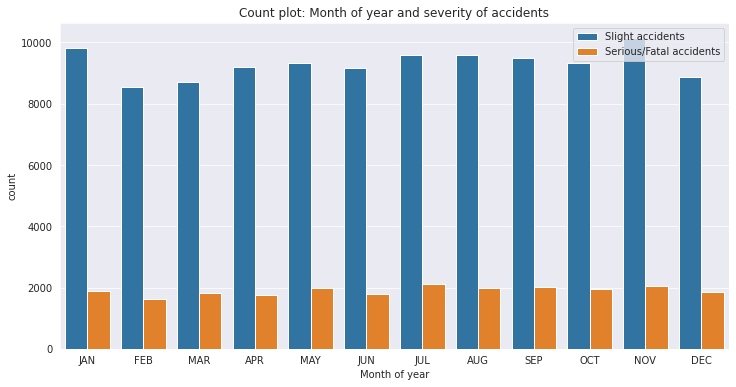

Chi-squared test of independence between months of year and severity of accidents

month              APR   AUG   DEC   FEB   JAN  ...   MAR   MAY    NOV   OCT   SEP
Serious_Accident                                ...                               
0                 9183  9577  8868  8554  9835  ...  8714  9327  10140  9328  9501
1                 1769  1997  1856  1623  1882  ...  1820  1989   2034  1960  2015

[2 rows x 12 columns]
Power_divergenceResult(statistic=59180.993953934034, pvalue=0.0)


In [28]:
plt.figure(figsize=(12,6))
# Count plot  
sns.countplot(x=df['month'], hue="Serious_Accident", data=df, order=[mapper[i] for i in mapper])
plt.xlabel('Month of year')
plt.title('Count plot: Month of year and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between months of year and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','month')

Similarly, fatal/serious accidents happen smoothly throughout the year, and Slight accidents are more likely to happen in Jan and Nov. The chi-sq test indicates the **Month of Year** variable is statistically significant and should be considered.

* **Day of Month**

In [29]:
# Split day from date
df['day'] = pd.DatetimeIndex(df['Date']).day

# Day of month
df['day'] = [f"Day {i}" for i in df['day']]

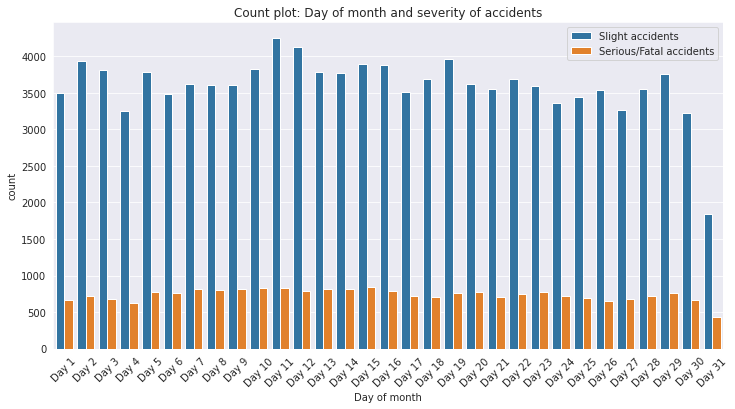

Chi-squared test of independence between days of month and severity of accidents

day               Day 1  Day 10  Day 11  Day 12  ...  Day 6  Day 7  Day 8  Day 9
Serious_Accident                                 ...                            
0                  3492    3826    4253    4125  ...   3490   3628   3611   3613
1                   671     831     829     787  ...    762    820    808    816

[2 rows x 31 columns]
Power_divergenceResult(statistic=61107.38728989178, pvalue=0.0)


In [30]:
plt.figure(figsize=(12,6))
# Count plot  
sns.countplot(x=df['day'], hue="Serious_Accident", data=df, order=[f"Day {i + 1}" for i in range(31)])
plt.xlabel('Day of month')
plt.xticks(rotation='45')
plt.title('Count plot: Day of month and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between days of month and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','day')

The 31th day are likely to have less accidents, and this fact is reasonable since some months do not include the 31th day. We still have to do the chi-sq test to make conclusions. And similarly this variable is still significant.

* **Hour of Day**

In [31]:
# Hour of day
df['hour'] = pd.DatetimeIndex(df['Time']).hour

df['hour'] = [str(i) for i in df['hour']]

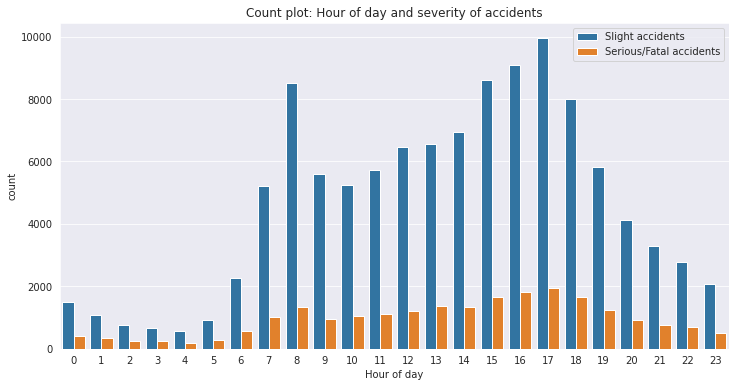

Chi-squared test of independence between hours of day and severity of accidents

hour                 0     1    10    11    12  ...    5     6     7     8     9
Serious_Accident                                ...                             
0                 1499  1085  5246  5717  6470  ...  927  2260  5201  8517  5587
1                  408   343  1037  1124  1208  ...  293   567  1011  1330   948

[2 rows x 24 columns]
Power_divergenceResult(statistic=135149.62399263182, pvalue=0.0)


In [32]:
plt.figure(figsize=(12,6))
# Count plot
sns.countplot(x=df['hour'], hue="Serious_Accident", data=df, order=[str(i) for i in range(24)])
plt.xlabel('Hour of day')
plt.title('Count plot: Hour of day and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between hours of day and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','hour')

Rush hours such as 7 in the morning and 3-6 in the evening are more likely to have accidents. This is accorded with the chart. The p-value is roughly 0 thus **hours of day** should be considered in regression.

* **First Road Class**

In [33]:
# Road class 
mapper = {1: "Class A", 2: "Class A", 3: "Class A", 4: "Class B", 5: "Class C"}
df['1st_Road_Class'] = [mapper[i] if i in mapper else "Unclassified" for i in df['1st_Road_Class']]

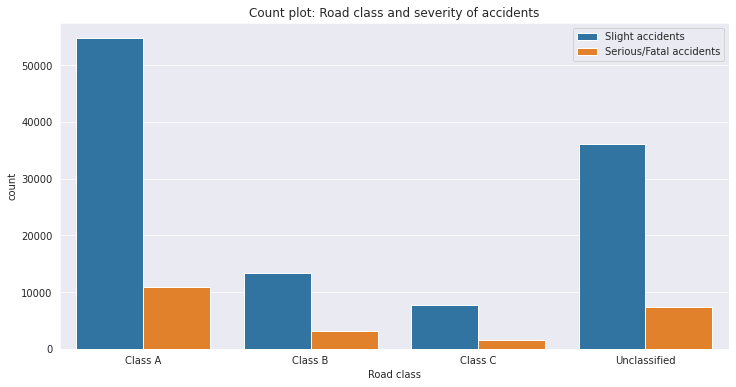

Chi-squared test of independence between first road classes and severity of accidents

1st_Road_Class    Class A  Class B  Class C  Unclassified
Serious_Accident                                         
0                   54731    13293     7703         36051
1                   10852     3115     1584          7304
Power_divergenceResult(statistic=145507.74534475204, pvalue=0.0)


In [34]:
plt.figure(figsize=(12,6))
# Count plot
sns.countplot(x=df['1st_Road_Class'], hue="Serious_Accident", data=df, order=["Class A", "Class B", "Class C", "Unclassified"])
plt.xlabel('Road class')
plt.title('Count plot: Road class and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between first road classes and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','1st_Road_Class')

It's significant.

* **Road Type**

In [35]:
# Drop missing coded as -1
df = df.drop(df[df.Road_Type == -1].index)

# Road Type
mapper = {3: "Dual Carriage Way", 6: "Single Carriage Way"}
df['Road_Type'] = [mapper[i] if i in mapper else 'Road Type Other' for i in df['Road_Type']]

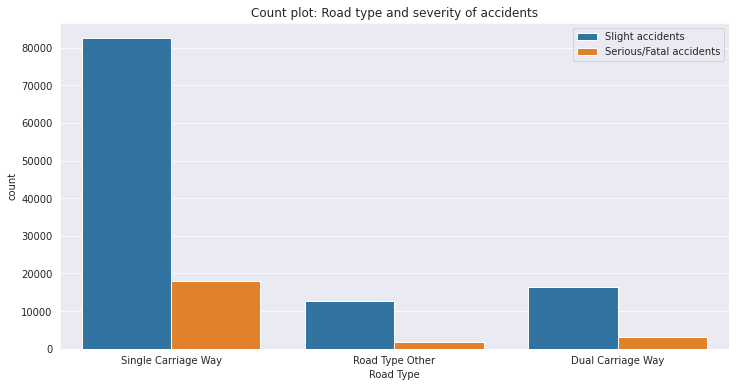

Chi-squared test of independence between road types and severity of accidents

Road_Type         Dual Carriage Way  Road Type Other  Single Carriage Way
Serious_Accident                                                         
0                             16472            12820                82486
1                              3017             1840                17998
Power_divergenceResult(statistic=202997.53365816706, pvalue=0.0)


In [36]:
plt.figure(figsize=(12,6))
# Count plot
sns.countplot(x=df['Road_Type'], hue="Serious_Accident", data=df)
plt.xlabel('Road Type')
plt.title('Count plot: Road type and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between road types and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','Road_Type')

It is significant as well.

* **Speed Limit**

In [37]:
# Speed limit
df['Speed_limit'] = [f"Limit {int(i)}" for i in df['Speed_limit']]

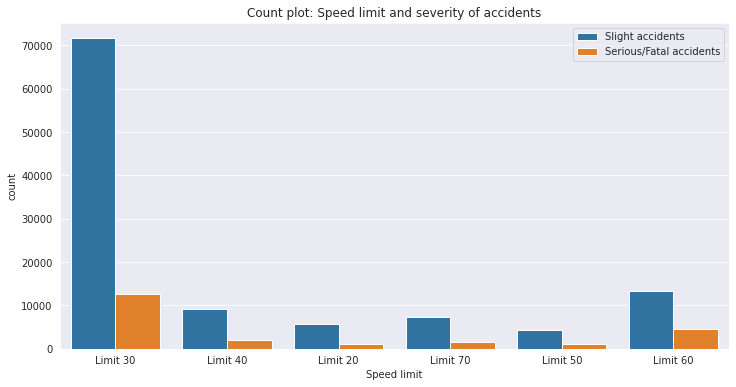

Chi-squared test of independence between road types and severity of accidents

Speed_limit       Limit 20  Limit 30  Limit 40  Limit 50  Limit 60  Limit 70
Serious_Accident                                                            
0                     5690     71631      9262      4441     13383      7371
1                     1021     12637      1993      1114      4594      1496
Power_divergenceResult(statistic=372667.1558013267, pvalue=0.0)


In [38]:
plt.figure(figsize=(12,6))
# Count plot
sns.countplot(x=df['Speed_limit'], hue="Serious_Accident", data=df)
plt.xlabel('Speed limit')
plt.title('Count plot: Speed limit and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between road types and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','Speed_limit')

Variable reserved.

* **Road Junction**

In [39]:
# Road junction
mapper = {0: "Within 20m", 1: "Roundabout", 2: "Roundabout", 3: "T section", 6: "Crossroads"}
df['Junction_Detail'] = [mapper[i] if i in mapper else 'Other_Junction' for i in df['Junction_Detail']]

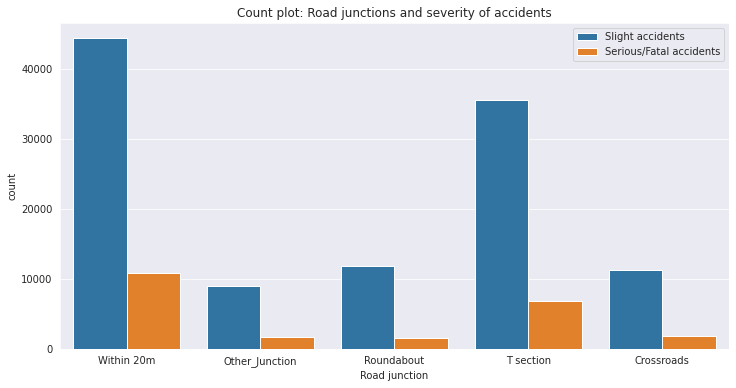

Chi-squared test of independence between road junctions and severity of accidents

Junction_Detail   Crossroads  Other_Junction  Roundabout  T section  Within 20m
Serious_Accident                                                               
0                      11204            8935       11763      35541       44335
1                       1836            1723        1577       6831       10888
Power_divergenceResult(statistic=143643.83963069975, pvalue=0.0)


In [40]:
plt.figure(figsize=(12,6))
# Count plot
sns.countplot(x=df['Junction_Detail'], hue="Serious_Accident", data=df)
plt.xlabel('Road junction')
plt.title('Count plot: Road junctions and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between road junctions and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','Junction_Detail')

Variable reserved.

* **Pedestrian crossing - physical facilities**

In [41]:
# Pedestrian_Crossing-Physical_Facilities
mapper = {0: "No Facility", 5: "Traffic Signal"}
df['PedCross_PhysFacs'] = [mapper[i] if i in mapper else 'Others' for i in df['Pedestrian_Crossing-Physical_Facilities']]

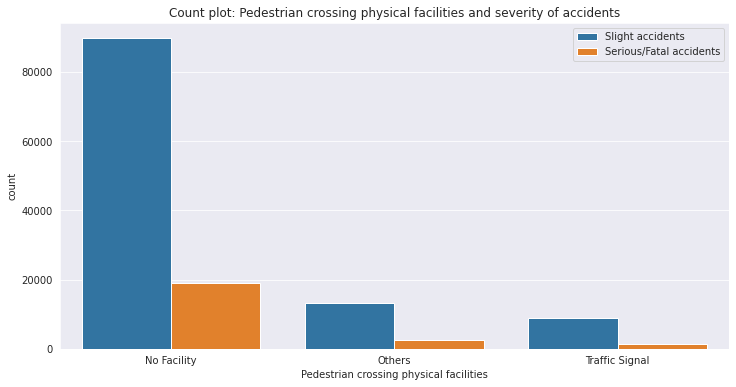

Chi-squared test of independence between pedestrian physical crossing facilities and severity of accidents

PedCross_PhysFacs  No Facility  Others  Traffic Signal
Serious_Accident                                      
0                        89699   13289            8790
1                        18997    2586            1272
Power_divergenceResult(statistic=251704.537349684, pvalue=0.0)


In [42]:
plt.figure(figsize=(12,6))
# Count plot
sns.countplot(x=df['PedCross_PhysFacs'], hue="Serious_Accident", data=df)
plt.xlabel('Pedestrian crossing physical facilities')
plt.title('Count plot: Pedestrian crossing physical facilities and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between pedestrian physical crossing facilities and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','PedCross_PhysFacs')

Variable reserved.

* **Light Conditions**

In [43]:
# Light conditions
mapper = {1: "Daylight", 4: "Dark - Light Lit"}
df['Light_Conditions'] = [mapper[i] if i in mapper else 'Other_LightConditions' for i in df['Light_Conditions']]

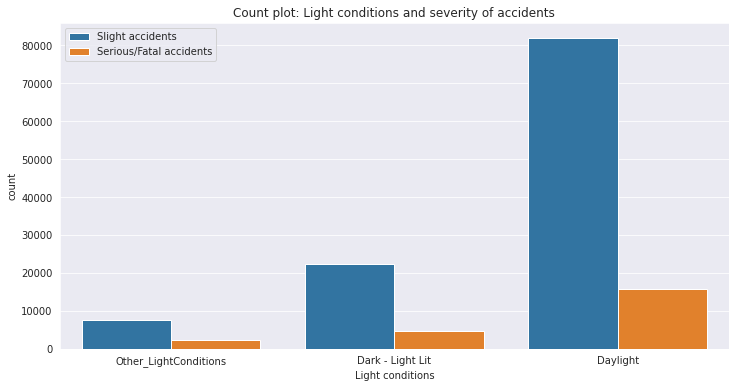

Chi-squared test of independence between road light conditions and severity of accidents

Light_Conditions  Dark - Light Lit  Daylight  Other_LightConditions
Serious_Accident                                                   
0                            22385     81828                   7565
1                             4775     15793                   2287
Power_divergenceResult(statistic=201016.7534928287, pvalue=0.0)


In [44]:
plt.figure(figsize=(12,6))
# Count plot
sns.countplot(x=df['Light_Conditions'], hue="Serious_Accident", data=df)
plt.xlabel('Light conditions')
plt.title('Count plot: Light conditions and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between road light conditions and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','Light_Conditions')

Variable is useful.

* **Road surface conditions**

In [45]:
# Drop missing data coded as -1
df = df.drop(df[df.Road_Surface_Conditions == -1].index)

# Road conditions
mapper = {1: "Dry", 2: "Wet", 5: "Wet"}
df['Road_Surface_Conditions']=[mapper[i] if i in mapper else 'Other' for i in df['Road_Surface_Conditions']]

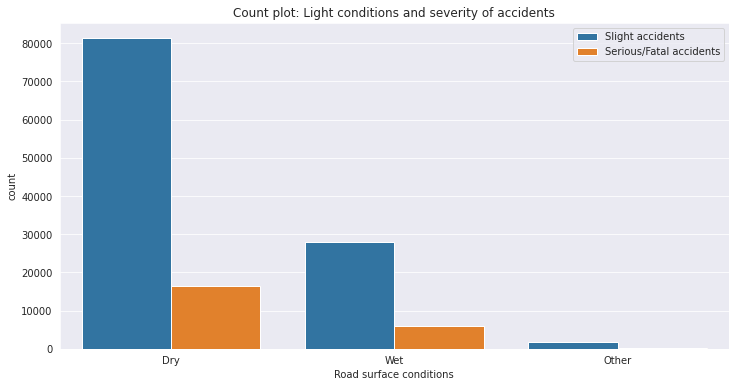

Chi-squared test of independence between road surface conditions and severity of accidents

Road_Surface_Conditions    Dry  Other    Wet
Serious_Accident                            
0                        81318   1906  27858
1                        16498    333   5958
Power_divergenceResult(statistic=211242.31569944206, pvalue=0.0)


In [46]:
plt.figure(figsize=(12,6))
# Count plot
sns.countplot(x=df['Road_Surface_Conditions'], hue="Serious_Accident", data=df)
plt.xlabel('Road surface conditions')
plt.title('Count plot: Light conditions and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between road surface conditions and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','Road_Surface_Conditions')

Still consider keeping the variable.

* **Urban rural classification of accident location**

In [47]:
# Urban
df["Urban"] = ["Urban" if i == 1 else 'Rural' for i in df['Urban_or_Rural_Area']]

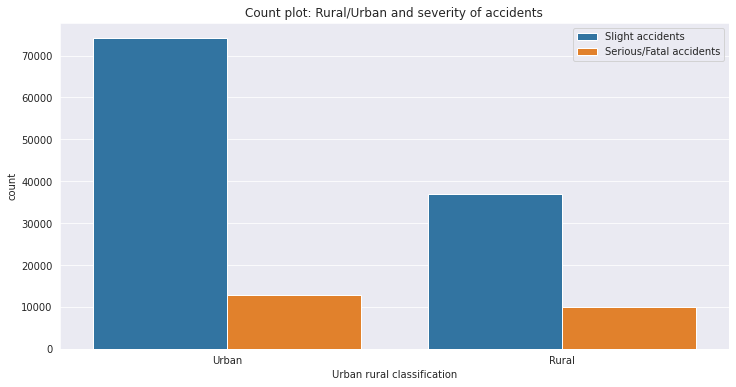

Chi-squared test of independence between rural/urban and severity of accidents

Urban             Rural  Urban
Serious_Accident              
0                 36941  74141
1                 10001  12788
Power_divergenceResult(statistic=79022.85474075789, pvalue=0.0)


In [48]:
plt.figure(figsize=(12,6))
# Count plot
sns.countplot(x=df['Urban'], hue="Serious_Accident", data=df)
plt.xlabel('Urban rural classification')
plt.title('Count plot: Rural/Urban and severity of accidents')
plt.legend(labels=['Slight accidents', 'Serious/Fatal accidents'])
plt.show()

# Table of counts and chi-squared test of independence
print('Chi-squared test of independence between rural/urban and severity of accidents', color=[91])
print()
chi_sq_test('Serious_Accident','Urban')

Keep the last variable.

## Step 4: feature (variable) filtrating

### Step 4-1: Basic Filterating 
(based on the previous results)

In [49]:
# Convert categirical variables into present/absent or dummy variables
## split big variables into small components
df = pd.get_dummies(df, columns=['Day_of_Week', 'month', 'day', 'hour', '1st_Road_Class', 'Road_Type', 
                                 'Speed_limit','Junction_Detail', 'PedCross_PhysFacs', 'Light_Conditions',
                                 'Road_Surface_Conditions', 'Urban'])

In [50]:
# Keep relevant df features only
df = df.drop(['Accident_Index','Location_Easting_OSGR', 'Location_Northing_OSGR', 'Police_Force', 'Accident_Severity',
              'Date','Time','Local_Authority_(District)','Local_Authority_(Highway)','1st_Road_Number',
              'Junction_Control', '2nd_Road_Class','2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
              'Pedestrian_Crossing-Physical_Facilities','Special_Conditions_at_Site','Carriageway_Hazards',
              'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','Weather_Conditions'], axis=1)

### Step 4-2: Heatmap of correlation matrix

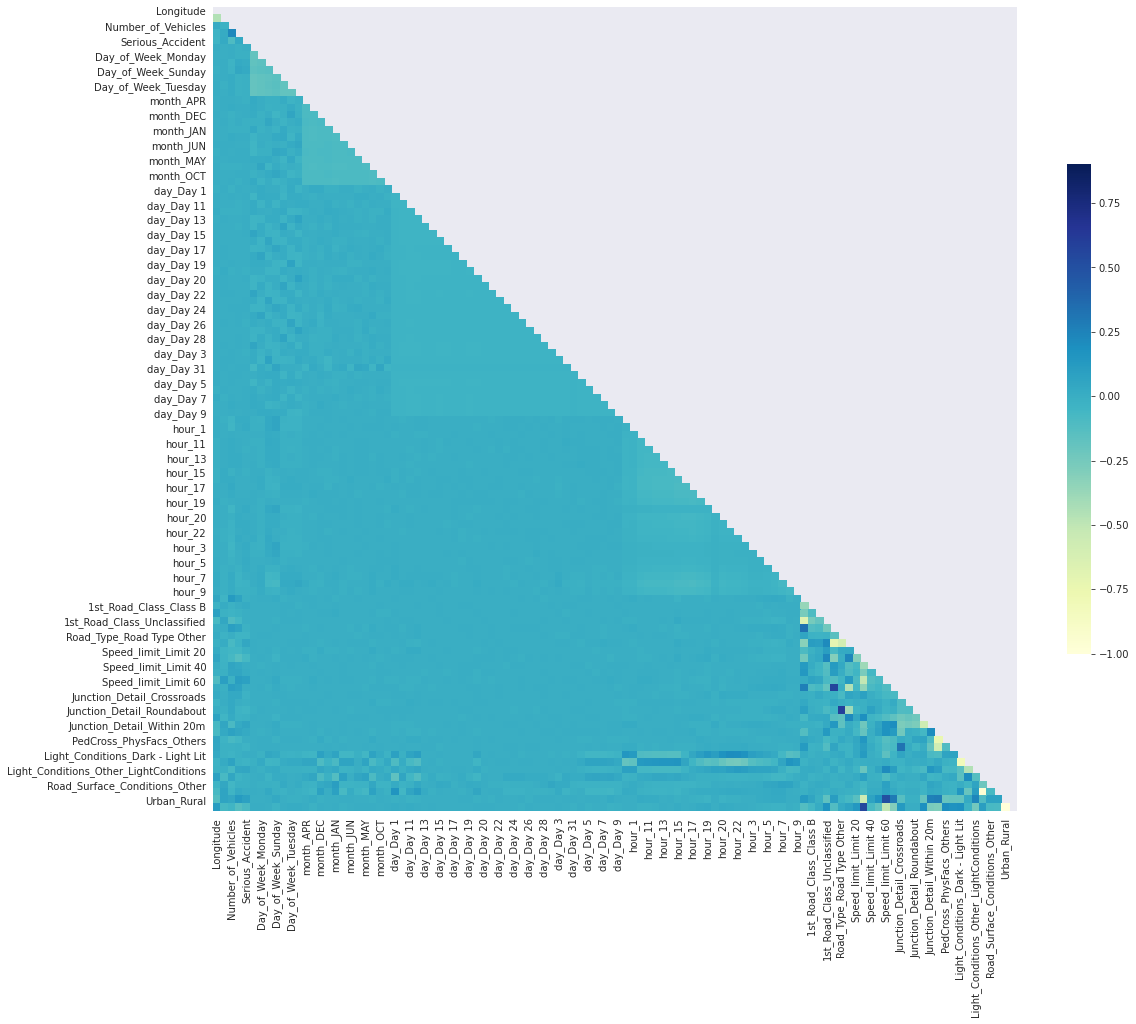

In [51]:
# Correlation heatmap (symmetric plot)
corrmat = df.corr()
plt.subplots(figsize=(18,18))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, mask=mask, vmax=0.9, cmap="YlGnBu", square=True,
            cbar_kws={"shrink": .5})
plt.show()

### Step 4-3: Seperate features and labels

Provide features to machine learning model (known), y is the unknown part, x is the known part.

In [52]:
# Seperate label (y) and features (x)
y = df.loc[:,'Serious_Accident']
x = df.loc[:, df.columns != 'Serious_Accident']
print('Shape of y: \n', y.shape[0])
print('Shape of x: \n', x.shape)

Shape of y: 
 133871
Shape of x: 
 (133871, 107)


Total 107 features. This is too much for machine learning models, we need to delete some features to reduce the number of features. Therefore, some other method is needed.

### Step 4-4: Advanced Filterating
* **Principal component analysis (PCA)**



In [53]:
# Standardizing the features
x_stand = StandardScaler().fit_transform(x)

# PCA to keep 95% of variance
pca = PCA(0.95)

# Components required to keep 95% of variance (fit)
x_pca = pca.fit_transform(x_stand)

# Cumulative sum of explained variance by the components
var_cumsum = pca.explained_variance_ratio_.cumsum()
print("Cumulative Sum of variance when increase number of components",
      color=[91])
print(var_cumsum)
print()
print(f'Need to keep {len(var_cumsum)} components to explain 95% of the variance.',
      color=[43])

Cumulative Sum of variance when increase number of components
[0.03819552 0.06589239 0.09265458 0.11096778 0.12866257 0.14443392
 0.15898687 0.17274638 0.18590785 0.19898874 0.21165123 0.22407286
 0.23631586 0.2482468  0.2598954  0.27128823 0.28252864 0.29343287
 0.30426069 0.31489569 0.32550884 0.33610882 0.34665143 0.35712471
 0.36751273 0.37786763 0.3882186  0.39853855 0.40883686 0.41905566
 0.42924047 0.43941419 0.44955797 0.45965701 0.46970079 0.47969644
 0.48967189 0.49961902 0.50954417 0.51946257 0.52936785 0.53925676
 0.54913437 0.5589825  0.56876462 0.57852153 0.58826567 0.59795759
 0.60764225 0.61732457 0.62699103 0.63665206 0.6463044  0.65594963
 0.66557281 0.67518994 0.68479203 0.69438479 0.70395815 0.71351989
 0.72307036 0.73260189 0.74211118 0.75161063 0.76110355 0.77056129
 0.78000782 0.78944389 0.79886126 0.8082506  0.81762446 0.82697769
 0.83628484 0.84554127 0.854763   0.86393639 0.87307514 0.88218118
 0.89113124 0.89995934 0.90874895 0.91723908 0.92564549 0.93389857


<Figure size 432x432 with 0 Axes>

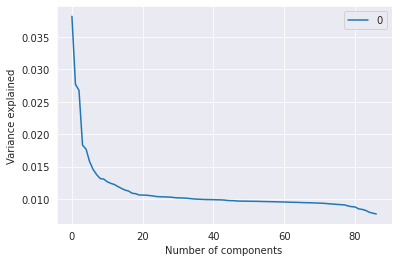

In [54]:
# visual explaination
plt.figure(figsize=(6,6))
pd.DataFrame(list(pca.explained_variance_ratio_)).plot()
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.show()

According to PCA result, we are able to deduct 20 features from the total features to retain 95% variance. However, 87 is still too large for the ML model, we would use **K-best method** to further reduce the number of features.

* **K-best Features Method**


In [55]:
# Select k best features
k = 15
x_kbest = x[x.columns[SelectKBest(f_classif, k=k).fit(x, y).get_support()]]
print("K best features:", color=[91])
print("\n".join(list(x_kbest.columns)))
print('Shape: ', x_kbest.shape, color=[91])

K best features:
Longitude
Latitude
Number_of_Vehicles
Number_of_Casualties
Road_Type_Road Type Other
Road_Type_Single Carriage Way
Speed_limit_Limit 30
Speed_limit_Limit 60
Junction_Detail_Roundabout
Junction_Detail_Within 20m
PedCross_PhysFacs_Traffic Signal
Light_Conditions_Daylight
Light_Conditions_Other_LightConditions
Urban_Rural
Urban_Urban
Shape:  (133871, 15)


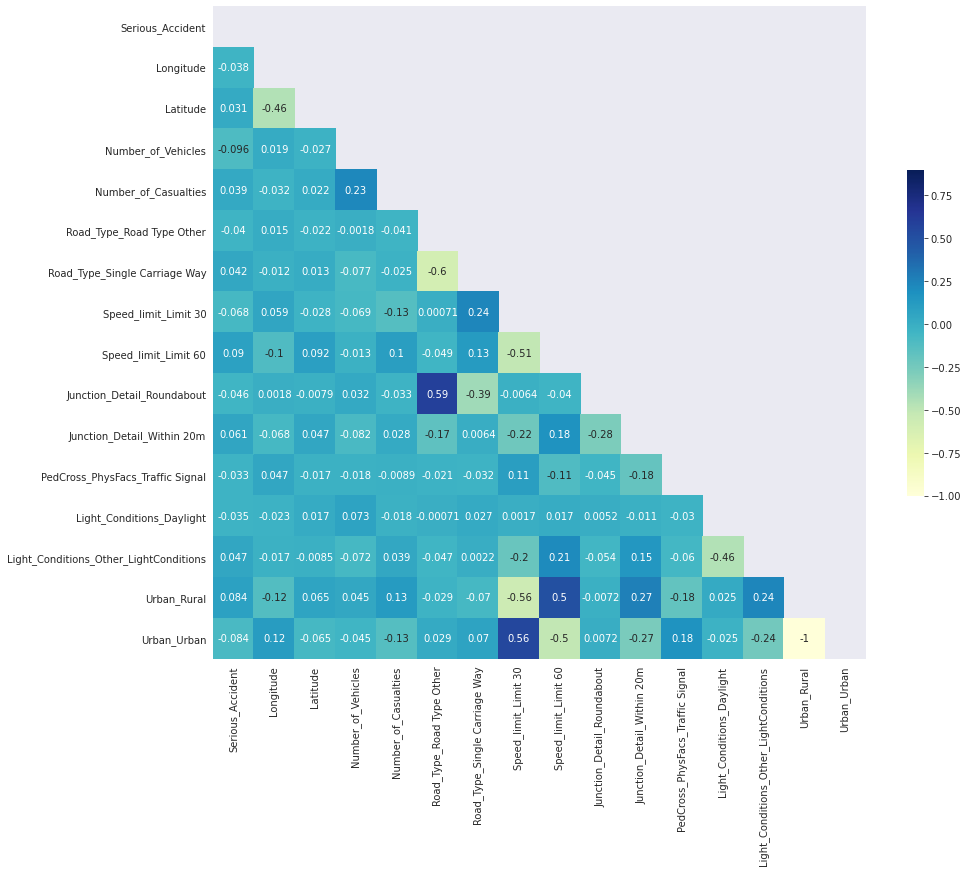

In [56]:
# Heatmap with 15 best features
df_kbest = pd.concat([y, x_kbest], axis=1)
corrmat = df_kbest.corr()
plt.subplots(figsize=(15,12))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, annot=True, mask=mask, vmax=0.9, cmap="YlGnBu",
            square=True, cbar_kws={"shrink": .5})
plt.show()

So far, we would only keep 15 features to make the machine learning model faster. The purpose of doing this is purely reducing the burden on the GPU and reduce the time consuming on the analysis. However, if the GPU is good enough handling all the variables, it would be more accurate to include all of them.

In [57]:
# samples after advanced filter (final samples)
print('Number of samples: ', df.shape[0], color=[43])
print('Proportion of positive outcomes: ', round(df['Serious_Accident'].mean(),
                                                 2), color=[43])

Number of samples:  133871
Proportion of positive outcomes:  0.17


Since the positive proportion of outcome is 17%, the sample is imbalanced, and we need to adjust the sample to 50-50 to make sure the training data's distribution is balanced. For example: make slight 33%, serious 33%, fatal 33%.

### Step 4-5: Split train and test samples


In [58]:
# Split samples into train (80%) and test (20%) samples
X_train, X_test, y_train, y_test = train_test_split(x_kbest, y,test_size=0.2,
                                                    random_state=321)
                                                    # "seed" while randomization
print('Train samples: ', X_train.shape)
print('Test samples: ', X_test.shape)

Train samples:  (107096, 15)
Test samples:  (26775, 15)


### Step 4-6: Balance the sample

In [59]:
# Random under sampling of majority class
rus = RandomUnderSampler(random_state=321)

X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
idx = rus.sample_indices_
print('Random under sampling', Counter(y_train_rus))

Random under sampling Counter({0: 18324, 1: 18324})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Here, both serious and non-serious have 18324. Training data has a total number of 36648.

In [60]:
# Define a function to fit, predict and then print outputs
## the codes below help all models show their final results.

def fit_eval_clf(model): # "model" as parameter
    start = time()
    # Fit the model in train samples
    prediction = model.fit(X_train_rus, y_train_rus).predict(X_test)
    
    # Cross-validated accuracy score
    accu_train = cross_val_score(model, X_train_rus, y_train_rus, cv=10, scoring='accuracy')
    print(f"Cross-validated accuracy score on train samples: {accu_train.mean():.3} (+/-{accu_train.std() * 2:.3})")
    
    # Cros-validated area under ROC curve 
    ## better model if area under curve larger (ROC)
    au_roc_train = cross_val_score(model, X_train_rus, y_train_rus, cv=10, scoring='roc_auc')
    print (f"Cross-validated area under ROC curve on train samples: {au_roc_train.mean()} (+/- {au_roc_train.std() * 2})")
    print('\n')
      
    # print results:
    # Accuracy score on test samples
    print (f"Accuracy score on test samples: ", round(accuracy_score(y_test, prediction), 4))
    
    # Area under ROC on test samples
    print (f"Area under ROC curve on test samples: ", round(roc_auc_score(y_test, prediction), 4))
    print()
    print(f"Total time to run: {(time() - start) / 60:.2} minutes.")

In [61]:
def rand_search_cv(model, params):
    start = time()
    # Tune the hyperparameters via a randomized search
    rgrid = RandomizedSearchCV(model, params, random_state=321, scoring='roc_auc')
    rgrid.fit(X_train_rus, y_train_rus)
    print(f"Randomized search took {(time() - start) / 60} minutes.")
    print('Best hyperparameters: ', rgrid.best_params_)
    return rgrid.best_params_

## Step 5: Classification

### Step 5-1: Classifiers: Baseline performance

* **K-Nearest Neighbors (KNN) Classifier**

In [62]:
print('KNN Classifier: Baseline performance\n')
fit_eval_clf(KNeighborsClassifier(n_jobs=-1))

KNN Classifier: Baseline performance

Cross-validated accuracy score on train samples: 0.564 (+/-0.0187)
Cross-validated area under ROC curve on train samples: 0.5837568905649098 (+/- 0.021920974643870394)


Accuracy score on test samples:  0.5654
Area under ROC curve on test samples:  0.5679

Total time to run: 0.29 minutes.


* **Support Vector Machine Classifier**

In [ ]:
print('Support Vector: Baseline performance\n')
fit_eval_clf(SVC(random_state=321))

Support Vector: Baseline performance



* **Logistic Regression** (Classifier)

In [ ]:
print('Logistic Regression: Baseline performance\n')
fit_eval_clf(LogisticRegression(random_state=321))

Note this is faster and the result is better than KNN. Line 2,3 are the result based on training data, line 4,5 are the result based on the test data.

* **Random Forest**\
Used 100 decision tree (default)

In [ ]:
print('Random Forest: Baseline performance\n')
fit_eval_clf(RandomForestClassifier(n_jobs=-1,random_state=321))

### Step 5-2: Classifiers: Tune hyperparameters

* **Tune K-Nearest Neighbors (KNN) Classifier**

In [ ]:
# Construct the set of hyperparameters to tune
params = {'n_neighbors':[5,6,7],
          'leaf_size':[1,2,3],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree']}
best_knn = rand_search_cv(KNeighborsClassifier(), params)

In [ ]:
print('KNN Classifier: Performance after tuning hyperparameters\n')
fit_eval_clf(KNeighborsClassifier(**best_knn, n_jobs=-1))

* **Tune Support Vector**

In [ ]:
# Construct the set of hyperparameters to tune
params = {'C': [0.01,0.1,1,3], 
          'gamma': [0.01, 0.1, 1]}
best_sv = rand_search_cv(SVC(), params)

In [ ]:
print('Support Vector: Performance after tuning hyperparameters\n')
fit_eval_clf(SVC(**best_sv, random_state=321))

* **Tune Logistic Regression**

In [ ]:
# Construct the set of hyperparameters to tune
params = {'C': [0.01, 0.1, 1, 5, 10],
          'penalty':['l2']}
best_lr = rand_search_cv(LogisticRegression(random_state=321), params)

In [ ]:
print('Logistic Regression: Performance after tuning hyperparameters\n')
fit_eval_clf(LogisticRegression(**best_lr, random_state=321))

The result is not improved...

* **Tune Random Forest**

In [ ]:
# Construct the set of hyperparameters to tune
params = {'max_depth': [ 10, 15, 20, 30, 40],
          'min_samples_leaf': [1, 3, 4, 7],
          'min_samples_split': [2, 5, 7, 9],
          'n_estimators': [100, 200, 500, 700]}
best_rf = rand_search_cv(RandomForestClassifier(), params)

In [ ]:
print('Random Forest: Performance after tuning hyperparameters \n')
fit_eval_clf(RandomForestClassifier(**best_rf, n_jobs=-1, random_state=321))

In [ ]:
# Feature importances
model = RandomForestClassifier(**best_rf, n_jobs=-1, random_state=321)
model.fit(X_train_rus,y_train_rus)

feat_imp = pd.Series(model.feature_importances_, index=x_kbest.columns).sort_values(ascending=False)

# Set figure size
fig = plt.figure(figsize=(12,9))
ax = fig.gca()

feat_imp.plot(kind='bar', title='Tuned Random Forest: Feature Importances', ax=ax)
plt.ylabel('Feature Importance Score')
plt.tight_layout()
plt.show()

### Step 5-3: Ensemble Method

* **Voting Classifier** \
(Let every model train the same data, then let the new data train all the models.)

In [ ]:
start = time()

# Tuned Classifiers
knn = KNeighborsClassifier(**best_knn,n_jobs=-1)
svc = SVC(**best_sv, probability=True)
logit = LogisticRegression(**best_lr, random_state=321)
rfc = RandomForestClassifier(**best_rf, n_jobs=-1, random_state=321)

# Create the ensemble model
voting_clf = VotingClassifier(estimators=[('KNN', knn), ('Support Vector', svc),
                                          ('Logistic Regression', logit),
                                          ('Random Forest', rfc)], voting='soft',
                               weights=[1,2,2,2])

#Fit the model 
prediction=voting_clf.fit(X_train_rus, y_train_rus).predict(X_test)

# Accuracy score on test samples
print ("Accuracy score on test samples: ", round(accuracy_score (y_test, prediction), 4))
    
# Area under ROC on test samples
print ("Area under ROC curve on test samples: ", round(roc_auc_score (y_test, prediction), 4))
print()
print(f"Total time to run: {(time() - start) / 60:.2} minutes.")

* **Boosting method 1: Gradient boosting**

In [ ]:
print('Gradient boosting classifier\n')
fit_eval_clf(GradientBoostingClassifier(random_state=321))

* **Boosting method 2: Adaptive boosting**

In [ ]:
print('Adaptive boosting classifier\n')
fit_eval_clf(AdaBoostClassifier(random_state=321))

* **Stacking**

In [ ]:
print('Stacking classifier\n')
start=time()

# Stacking Classifier
stacked_clf = StackingClassifier(classifiers=[knn, svc, rfc], meta_classifier=logit)

#Fit the model 
prediction=stacked_clf.fit(X_train_rus, y_train_rus).predict(X_test)

# Accuracy score on test samples
print ("Accuracy score on test samples: ", round(accuracy_score (y_test, prediction), 4))
    
# Area under ROC on test samples
print ("Area under ROC curve on test samples: ", round(roc_auc_score (y_test, prediction), 4))
print()
print(f"Total time to run: {(time() - start) / 60:.2} minutes.")